# Part 1 – Data Preparation and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import cm
import seaborn as sns
from collections import Counter
from IPython.display import display

#set seaborn style
sns.set()
sns.set_style("whitegrid")


# Analyzing SEEK job market data

In [5]:
df = pd.read_csv('data.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head()


The Dataset consists of:  318477  rows and  13  columuns


/var/folders/h0/8_wby_212cs0h3_gmjklt61c0000gn/T/ipykernel_10571/1902105309.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


Date Range

In [6]:
dates = df.sort_values('Date')['Date'].dropna().unique()
start_date = dates[0]
end_date = dates[len(dates)-1]

In [7]:
start_date


'2018-10-01T00:00:00.000Z'

In [8]:
end_date


'2019-03-13T00:00:00.000Z'

Getting the number of variations for each attribute:

In [9]:
_ids = df['Id'].nunique()
_titles = df['Title'].nunique()
_companies = df['Company'].nunique()
_dates = df['Date'].nunique()
_locations = df['Location'].nunique()
_area = df['Area'].nunique()
_classes = df['Classification'].nunique()
_subclasses = df['SubClassification'].nunique()
_requirements = df['Requirement'].nunique()
_description = df['FullDescription'].nunique()
_lowest_salary = df['LowestSalary'].nunique()
_highest_salary = df['HighestSalary'].nunique()
_job_type = df['JobType'].nunique()


In [10]:
data = {'Columns': ['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification', 'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary', 'HighestSalary', 'JobType'],
        'Unique Values': [_ids, _titles, _companies, _dates, _locations, _area, _classes, _subclasses, _requirements, _description, _lowest_salary, _highest_salary, _job_type]}

df_unique = pd.DataFrame(data)

display(df_unique)


,Columns,Unique Values
0,Id,318477
1,Title,168065
2,Company,40628
3,Date,163
4,Location,65
5,Area,19
6,Classification,30
7,SubClassification,338
8,Requirement,234287
9,FullDescription,250901


How many records are there in the dataset?

In [11]:
num_records = len(df)
num_records

318477

Which location has the most job postings?

In [12]:
df['Location'].mode()[0]


'Sydney'

How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings.

In [13]:
job_sector_counts = df['Classification'].value_counts()
num_job_sectors = len(job_sector_counts)

print("Number of job sectors:", num_job_sectors)
print("Job sectors and their total job postings:")

for sector, count in job_sector_counts.items():
    print(sector, "-", count)


Number of job sectors: 30
Job sectors and their total job postings:
Information & Communication Technology - 22796
Trades & Services - 17976
Healthcare & Medical - 17085
Hospitality & Tourism - 15523
Manufacturing, Transport & Logistics - 12376
Administration & Office Support - 10020
Accounting - 9368
Education & Training - 9280
Construction - 8372
Sales - 8119
Retail & Consumer Products - 8041
Government & Defence - 7443
Engineering - 6458
Mining, Resources & Energy - 6288
Banking & Financial Services - 4633
Community Services & Development - 4485
Legal - 4237
Human Resources & Recruitment - 4144
Call Centre & Customer Service - 3971
Marketing & Communications - 3968
Real Estate & Property - 3614
Design & Architecture - 1811
Insurance & Superannuation - 1474
Consulting & Strategy - 1206
Sport & Recreation - 984
Science & Technology - 905
Farming, Animals & Conservation - 882
CEO & General Management - 844
Advertising, Arts & Media - 833
Self Employment - 93


how many sub-sectors are there in the Information & Communication Technology) sector? List the name of each sub-sector and
its’ job posting number

In [14]:
ict_subsector_counts = df[df['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts()
num_ict_subsectors = len(ict_subsector_counts)

print("Number of sub-sectors in the ICT sector:", num_ict_subsectors)
print("ICT sub-sectors and their job posting counts:")

for subsector, count in ict_subsector_counts.items():
    print(subsector, "-", count)


Number of sub-sectors in the ICT sector: 22
ICT sub-sectors and their job posting counts:
Developers/Programmers - 4211
Business/Systems Analysts - 2986
Programme & Project Management - 2413
Architects - 1548
Engineering - Software - 1437
Help Desk & IT Support - 1374
Networks & Systems Administration - 1194
Consultants - 1149
Other - 997
Testing & Quality Assurance - 831
Security - 774
Management - 746
Engineering - Network - 552
Database Development & Administration - 551
Web Development & Production - 452
Sales - Pre & Post - 449
Product Management & Development - 376
Telecommunications - 357
Team Leaders - 173
Engineering - Hardware - 116
Technical Writing - 97
Computer Operators - 13


List the salary ranges and their total of job postings.

In [15]:
salary_ranges = df['LowestSalary'].astype(str) + ' - ' + df['HighestSalary'].astype(str)
salary_counts = salary_ranges.value_counts()

print("Salary ranges and their total job postings:")
for salary_range, count in salary_counts.items():
    print(salary_range, "-", count)


Salary ranges and their total job postings:
0 - 30 - 62639
40 - 50 - 34436
70 - 80 - 28712
60 - 70 - 28499
100 - 120 - 27673
50 - 60 - 27027
150 - 200 - 25841
120 - 150 - 24514
80 - 100 - 24249
30 - 40 - 23476
200 - 999 - 11411


List the job types. In each job type, what are the lowest salary and highest salary?

In [16]:
df['JobType'].value_counts()


JobType
Full Time          201225
Contract/Temp       53906
Casual/Vacation     25355
Part Time           21893
Name: count, dtype: int64

In [17]:
job_types = ['Full Time', 'Contract/Temp', 'Casual/Vacation', 'Part Time']

print("Job types and their salary ranges:")
for job_type in job_types:
    filtered_df = df[df['JobType'] == job_type]
    lowest_salary = filtered_df['LowestSalary'].min()
    highest_salary = filtered_df['HighestSalary'].max()
    print(job_type, "- Lowest Salary:", lowest_salary, " Highest Salary:", highest_salary)


Job types and their salary ranges:
Full Time - Lowest Salary: 0  Highest Salary: 999
Contract/Temp - Lowest Salary: 0  Highest Salary: 999
Casual/Vacation - Lowest Salary: 0  Highest Salary: 999
Part Time - Lowest Salary: 0  Highest Salary: 999


# 1.2 Normalize and clean the data

The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You
should calculate the “AverageSalary” for each job.

In [18]:
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary) / 2)
df['AverageSalary'].value_counts()



AverageSalary
15.0     62639
45.0     34436
75.0     28712
65.0     28499
110.0    27673
55.0     27027
175.0    25841
135.0    24514
90.0     24249
35.0     23476
599.5    11411
Name: count, dtype: int64

The raw dataset values of the "Id" column had inconsistencies in their
representation. The Id values should have 8 number long integers only. Write code
to remove unnecessary characters.

In [19]:
df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)


The "Date" column is represented in a format that contained both date and time
information. However, the time is not correct and should be removed.

In [20]:
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df.head()


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


Change type of “Id” column to numeric and change type of “Date” column to
DateTime

In [31]:
# Set column "Id" to type int64
df["Id"] = df["Id"].astype(np.int64)

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])

# Data types after data cleaning and conversions
df.dtypes


Unnamed: 0                    int64
Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

Are there any duplicate data in the dataset? Provide the way you find them and your
solution to fix it

In [22]:
duplicate_count = df[df.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)
no_dates = df.drop('Date', axis=1)
duplicate_count_no_dates = no_dates[no_dates.duplicated()].shape[0]
difference = duplicate_count_no_dates - duplicate_count
print('Additional duplicates found without regard to timestamp: ', difference)


Duplicates found:  108
Additional duplicates found without regard to timestamp:  43


Removing duplicates:

In [23]:
df.drop_duplicates(inplace=True)


In [24]:
duplicate_count = df[df.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)
no_dates = df.drop('Date', axis=1)
duplicate_count_no_dates = no_dates[no_dates.duplicated()].shape[0]
difference = duplicate_count_no_dates - duplicate_count
print('Additional duplicates found without regard to timestamp: ', difference)


Duplicates found:  0
Additional duplicates found without regard to timestamp:  43


Check missing data and visualize them in a corresponding chart.

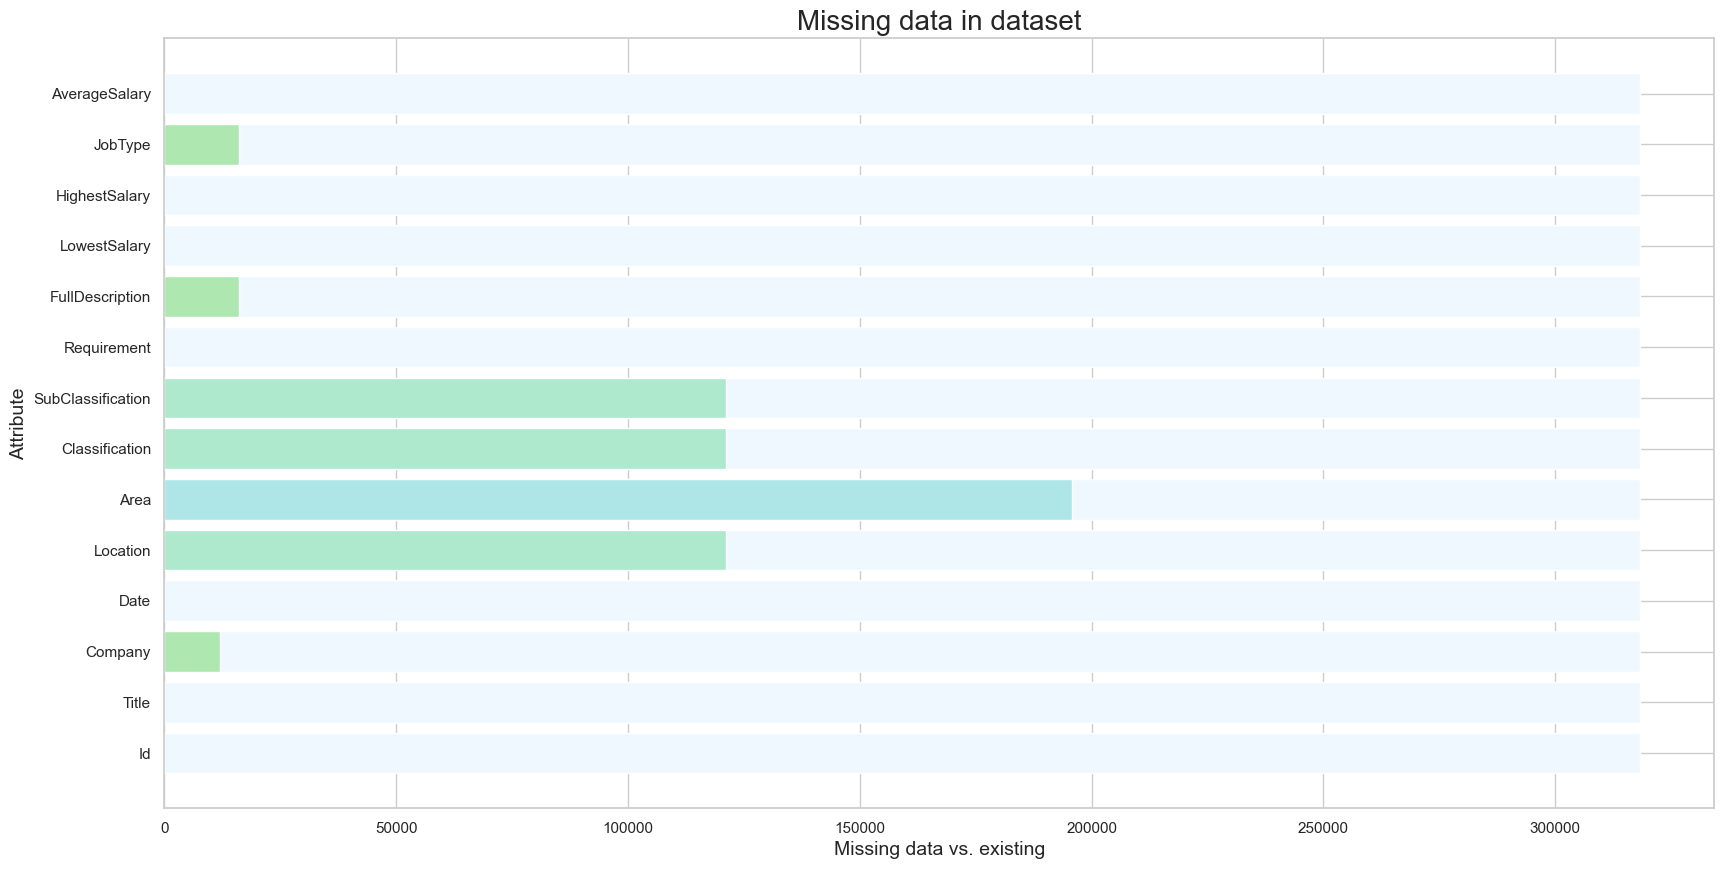

In [25]:
def colorize_bar(value, max_value):
    low, high = max_value * 0.2, max_value * 0.66
    if(value <= low):
        return '#AEE8B0'
    elif(value >= high):
        return '#AEE6E8'
    else:
        return '#AEE8CD'

    
nulls = df.isnull().sum()
cols = [colorize_bar(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20,10))
plt.barh(df.columns.values,total_data, color='aliceblue')
plt.barh(df.columns.values,nulls, color=cols)

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show();


In [26]:
nor = df.shape[0]

print('Attributes with missing data: ')
for i in range(len(nulls)):
    if(nulls[i] > 0):
        print('    {0}: {1:.2f}%'.format(df.columns.values[i], (nulls[i] / nor) * 100))
        

Attributes with missing data: 
    Company: 3.77%
    Location: 38.08%
    Area: 61.50%
    Classification: 38.08%
    SubClassification: 38.08%
    Requirement: 0.00%
    FullDescription: 5.07%
    JobType: 5.04%


In [27]:
#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

# Part 2 - Data Understanding

In [2]:
df = pd.read_csv('preprocessed_data.csv')
df.head()

/var/folders/h0/8_wby_212cs0h3_gmjklt61c0000gn/T/ipykernel_2232/1469898370.py:1: DtypeWarning: Columns (5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('preprocessed_data.csv')


,Unnamed: 0,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [7]:
colors = ['#AEE6E8', '#AEC7E8', '#AEC9E8', '#B0AEE8', '#CDAEE8', '#E8AEE6', '#E8AEC9']

two_colors = ['#B4AEE8','#D1AEE8','#E8AEE2','#E8AEC5','#E8B4AE', '#E8D1AE']

third_colour = ['#AEE6E8', '#AEC9E8', '#B0AEE8', '#CDAEE8', '#E8AEE6', '#E8AEC9']



Get the salary ranges using “AverageSalary”, the total jobs of each range and display
them in the bar chart

In [4]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Unnamed: 0,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,,
15.0,62586,62586,62586,59564,62586,38488,24364,38488,38488,62584,56043,62586,62586,56058,"15,000",62586
35.0,23471,23471,23471,22292,23471,16391,9809,16391,16391,23471,22091,23471,23471,22093,"35,000",23471
45.0,34431,34431,34431,32071,34431,21731,13259,21731,21731,34430,33575,34431,34431,33580,"45,000",34431
55.0,27018,27018,27018,25670,27018,16552,10746,16552,16552,27017,26197,27018,27018,26213,"55,000",27018
65.0,28495,28495,28495,27286,28495,18117,11390,18117,18117,28495,27542,28495,28495,27564,"65,000",28495
75.0,28706,28706,28706,27788,28706,17047,10451,17047,17047,28706,27664,28706,28706,27668,"75,000",28706
90.0,24249,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27669,27669,27669,27146,27669,17133,10571,17133,17133,27667,26678,27669,27669,26679,"110,000",27669
135.0,24506,24506,24506,24157,24506,14693,9476,14693,14693,24506,23602,24506,24506,23604,"135,000",24506


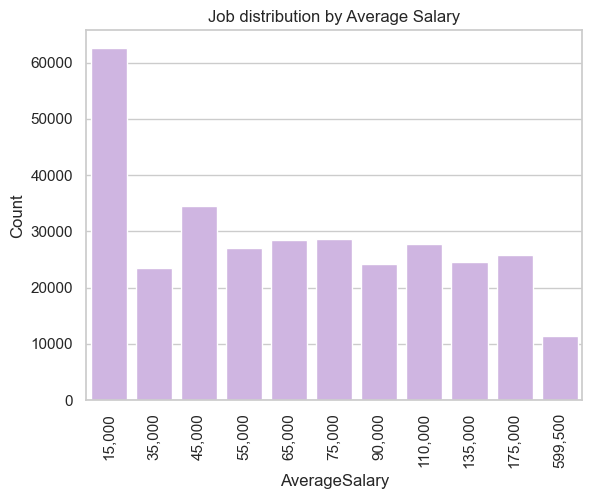

In [6]:
sns.set()
sns.set_style("whitegrid")

sns.barplot(data=averageSalaryDf, x="AverageSalary", y="Count", color="#D1AEE8")
plt.title("Job distribution by Average Salary")
plt.xticks(rotation = 90)
plt.show()

Display the list of job types and the number of jobs of each type using pie chart

In [41]:
df['JobType'].value_counts()


JobType
Full Time          201172
Contract/Temp       53897
Casual/Vacation     25353
Part Time           21889
Name: count, dtype: int64

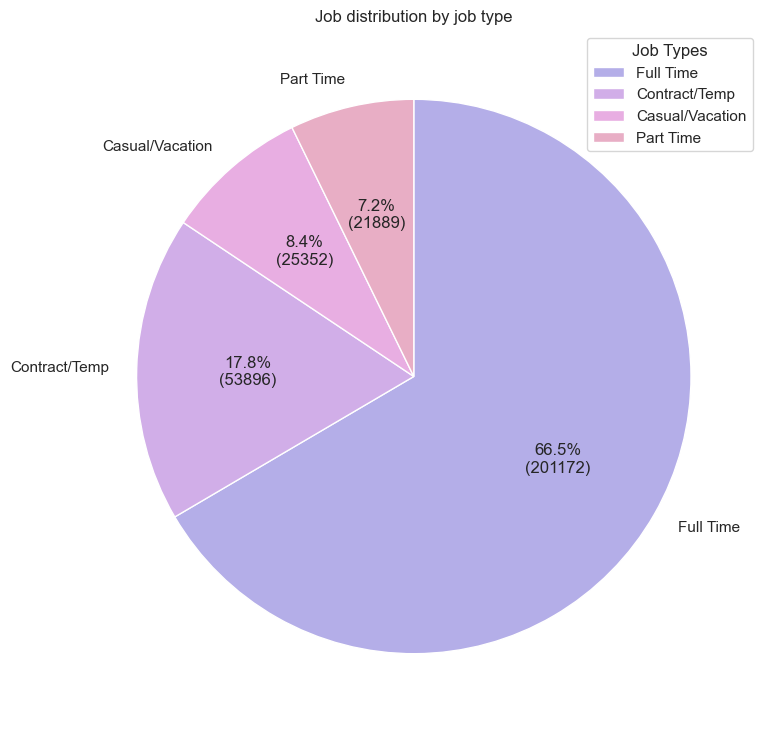

In [29]:
jobTypeCounts = df['JobType'].value_counts()

plt.figure(figsize=(9, 9))
plt.title("Job distribution by job type")

# Plotting the pie chart
plt.pie(
    jobTypeCounts.values,
    labels=jobTypeCounts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(jobTypeCounts.values) / 100)})',
    colors=two_colors,
    startangle=90,
    counterclock=False
)

# Adding a legend
plt.legend(title="Job Types", loc="best")

# Displaying the chart
plt.show()


Display the list of job sectors and the number of jobs of each type using horizontal bar
chart

In [8]:
classificationDf = df[df['Classification'].isna()==False]
classificationDf = classificationDf.groupby('Classification').count()
classificationDf['Classification'] = classificationDf.index
classificationDf['Count'] = classificationDf["Id"]
classificationDf.sort_values("Count", ascending=False, inplace=True)
classificationDf.head()

,Unnamed: 0,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Classification,Count
Classification,,,,,,,,,,,,,,,,
Information & Communication Technology,22787,22787,22787,22438,22787,22787,16083,22787,22787,21157,22787,22787,21158,22787,Information & Communication Technology,22787
Trades & Services,17966,17966,17966,16492,17966,17966,9664,17966,17966,17119,17966,17966,17120,17966,Trades & Services,17966
Healthcare & Medical,17068,17068,17068,16373,17068,17068,7948,17068,17068,16368,17068,17068,16371,17068,Healthcare & Medical,17068
Hospitality & Tourism,15513,15513,15513,14881,15513,15513,9634,15513,15513,14287,15513,15513,14291,15513,Hospitality & Tourism,15513
"Manufacturing, Transport & Logistics",12372,12372,12372,11461,12372,12372,8542,12372,12372,11748,12372,12372,11750,12372,"Manufacturing, Transport & Logistics",12372


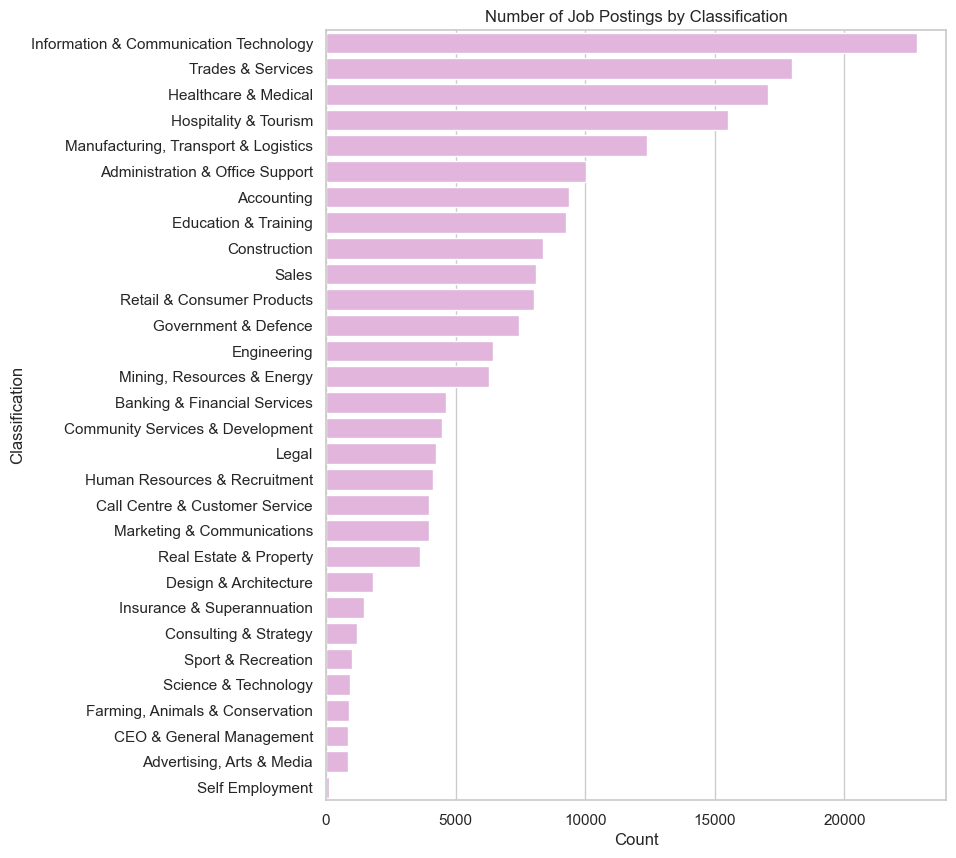

In [9]:
plt.figure(figsize=(8,10))
sns.barplot(data=classificationDf,
            y="Classification",
            x="Count",
            color="#E8AEE2")

plt.title("Number of Job Postings by Classification")
plt.show()

Choose your favorite location. Visualize the market share of that location in pie chart.

In [11]:
# Pie char for job market share of classifications
from matplotlib import cm

df_pie = df['Classification'].groupby(df['Classification'])

df_pie = df_pie.count().sort_values(ascending=False).to_frame()
df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index
df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']
df2

,Classification,Value
Classification,,
Information & Communication Technology,Information & Communication Technology,22787
Trades & Services,Trades & Services,17966
Healthcare & Medical,Healthcare & Medical,17068
Hospitality & Tourism,Hospitality & Tourism,15513
"Manufacturing, Transport & Logistics","Manufacturing, Transport & Logistics",12372
Administration & Office Support,Administration & Office Support,10017
Accounting,Accounting,9365
Education & Training,Education & Training,9272
Construction,Construction,8369


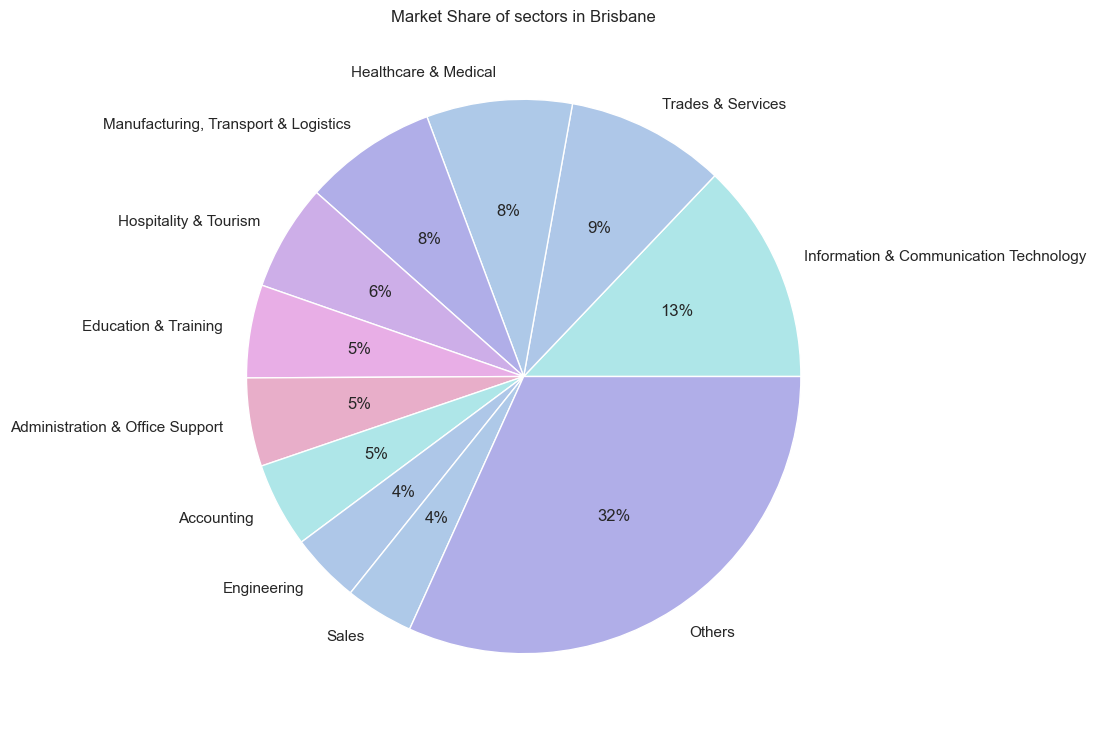

In [32]:
brisbane_df = df[df['Location'] == 'Brisbane']
df_pie = brisbane_df['Classification'].groupby(brisbane_df['Classification'])
df_pie = df_pie.count().sort_values(ascending=False).to_frame()

df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index

df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data={
    'Classification': ['Others'],
    'Value': [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']

plt.figure(figsize=(9, 9))
plt.title("Market Share of sectors in Brisbane")
plt.pie(df2["Value"], labels=df2["Classification"], autopct="%.0f%%", colors=colors)
plt.show()


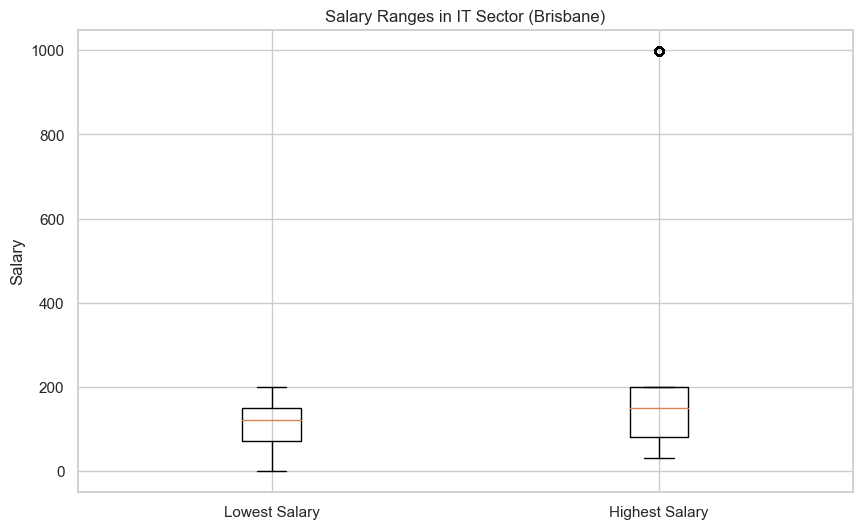

In [33]:
brisbane_it_df = df[(df['Location'] == 'Brisbane') & (df['Classification'] == 'Information & Communication Technology')]
salary_ranges = pd.concat([brisbane_it_df['LowestSalary'], brisbane_it_df['HighestSalary']], axis=1)

plt.figure(figsize=(10, 6))
plt.title("Salary Ranges in IT Sector (Brisbane)")
plt.boxplot(salary_ranges.values, labels=['Lowest Salary', 'Highest Salary'])
plt.ylabel("Salary")
plt.show()


In [34]:
brisbane_it_subsectors = df[(df['Location'] == 'Brisbane') & (df['Classification'] == 'Information & Communication Technology')]['SubClassification']
subsector_salary_ranges = []

for subsector in brisbane_it_subsectors.unique():
    subsector_data = df[(df['Location'] == 'Brisbane') & (df['Classification'] == 'Information & Communication Technology') & (df['SubClassification'] == subsector)]
    subsector_salary_ranges.append((subsector, subsector_data['LowestSalary'].min(), subsector_data['HighestSalary'].max()))

print("Salary ranges within the subsectors of the IT sector in Brisbane:")
for subsector, lowest_salary, highest_salary in subsector_salary_ranges:
    print(subsector)
    print("Lowest Salary:", lowest_salary)
    print("Highest Salary:", highest_salary)
    print()


Salary ranges within the subsectors of the IT sector in Brisbane:
Networks & Systems Administration
Lowest Salary: 0
Highest Salary: 999

Developers/Programmers
Lowest Salary: 0
Highest Salary: 999

Engineering - Network
Lowest Salary: 0
Highest Salary: 999

Consultants
Lowest Salary: 0
Highest Salary: 999

Help Desk & IT Support
Lowest Salary: 0
Highest Salary: 999

Engineering - Software
Lowest Salary: 0
Highest Salary: 999

Programme & Project Management
Lowest Salary: 0
Highest Salary: 999

Business/Systems Analysts
Lowest Salary: 0
Highest Salary: 999

Product Management & Development
Lowest Salary: 0
Highest Salary: 999

Architects
Lowest Salary: 0
Highest Salary: 999

Security
Lowest Salary: 0
Highest Salary: 999

Testing & Quality Assurance
Lowest Salary: 0
Highest Salary: 999

Telecommunications
Lowest Salary: 0
Highest Salary: 200

Sales - Pre & Post
Lowest Salary: 0
Highest Salary: 999

Other
Lowest Salary: 0
Highest Salary: 999

Web Development & Production
Lowest Salary: 0

Can you find the salary distribution for the top 30 cities for the number of job postings?
Visualize them in the boxplot chart.

In [15]:
city_counts = df['Location'].value_counts().nlargest(30)
top_cities = city_counts.index
df_top_cities = df[df['Location'].isin(top_cities)]


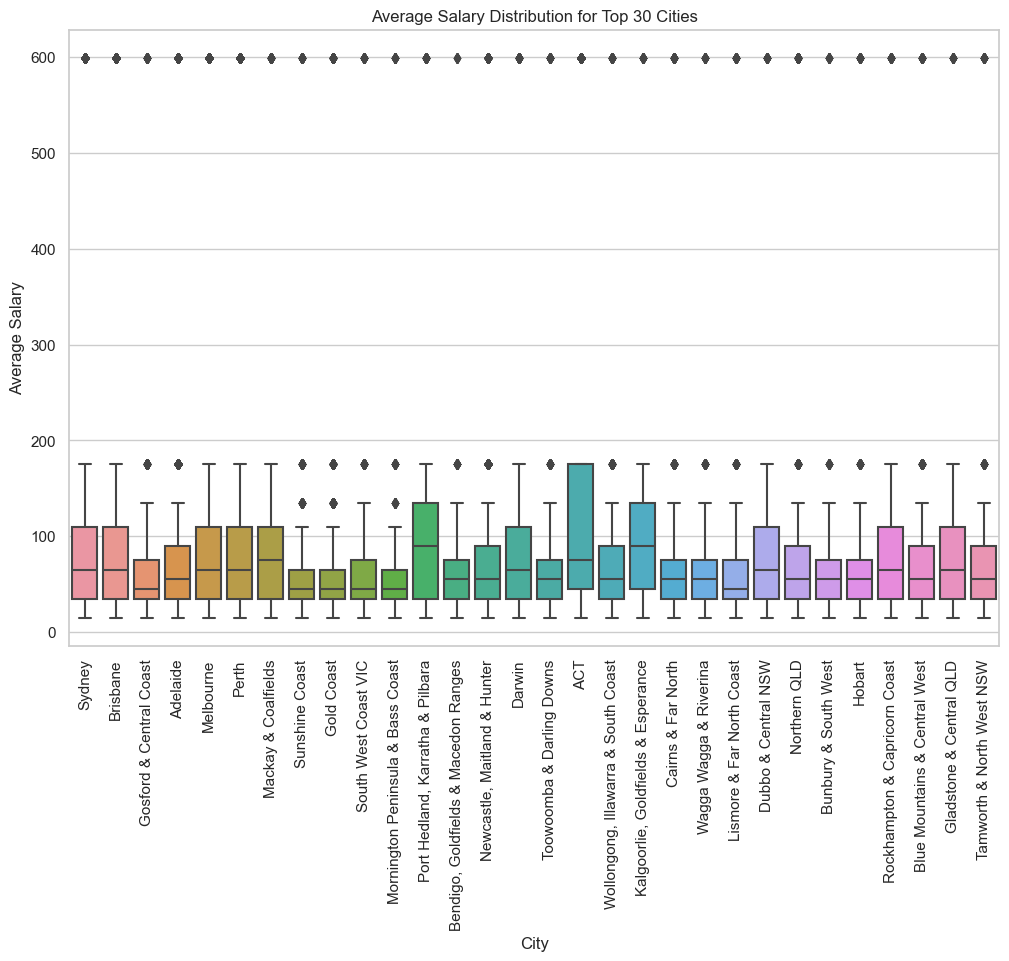

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='AverageSalary', data=df_top_cities)
plt.xticks(rotation=90)
plt.title('Average Salary Distribution for Top 30 Cities')
plt.xlabel('City')
plt.ylabel('Average Salary')
plt.show()

In [45]:
ictSubClassifications = df[df["Classification"] == 'Information & Communication Technology']
ictSubClassifications["SubClassification"].unique()


array(['Help Desk & IT Support', 'Sales - Pre & Post',
       'Networks & Systems Administration',
       'Programme & Project Management', 'Security', 'Consultants',
       'Architects', 'Other', 'Business/Systems Analysts',
       'Developers/Programmers', 'Web Development & Production',
       'Engineering - Software', 'Product Management & Development',
       'Engineering - Network', 'Team Leaders',
       'Testing & Quality Assurance', 'Management',
       'Database Development & Administration', 'Telecommunications',
       'Technical Writing', 'Engineering - Hardware',
       'Computer Operators'], dtype=object)

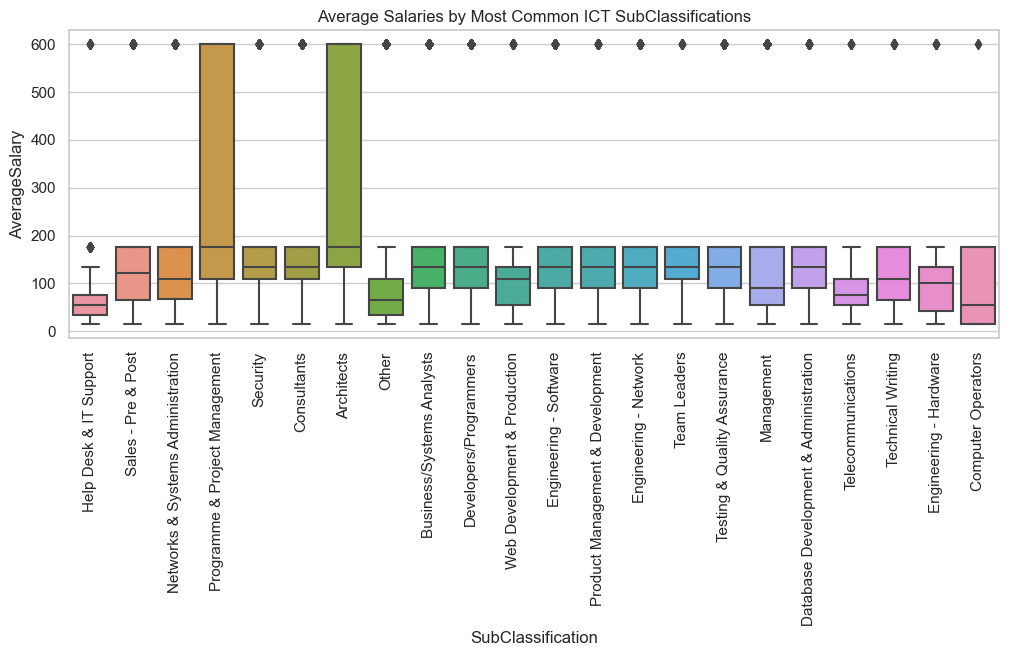

In [48]:
ictSubClassifications = df[df["Classification"] == 'Information & Communication Technology']

plt.figure(figsize=(12,4))
sns.boxplot(
    data=df,
    x="SubClassification",
    y="AverageSalary",
    order=ictSubClassifications["SubClassification"].unique()
)
plt.title("Average Salaries by Most Common ICT SubClassifications")
plt.xticks(rotation=90)
plt.show()

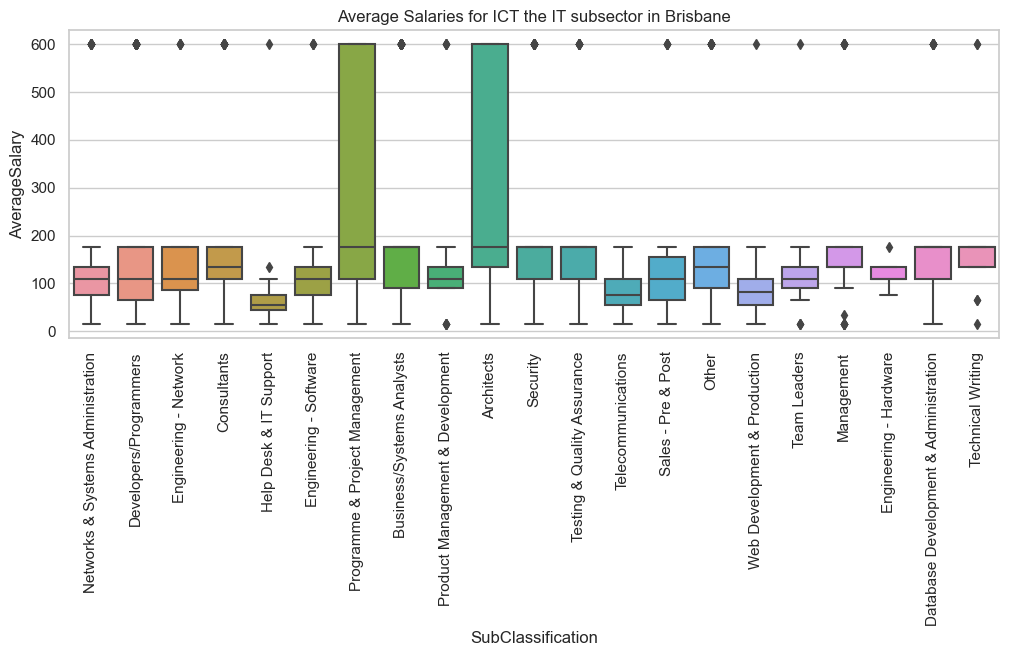

In [53]:
brisbane_ict_subclassifications = df[(df["Classification"] == 'Information & Communication Technology') & (df["Location"] == 'Brisbane')]

plt.figure(figsize=(12, 4))
sns.boxplot(
    data=brisbane_ict_subclassifications,
    x="SubClassification",
    y="AverageSalary",
    order=brisbane_ict_subclassifications["SubClassification"].unique()
)
plt.title("Average Salaries for ICT the IT subsector in Brisbane")
plt.xticks(rotation=90)
plt.show()


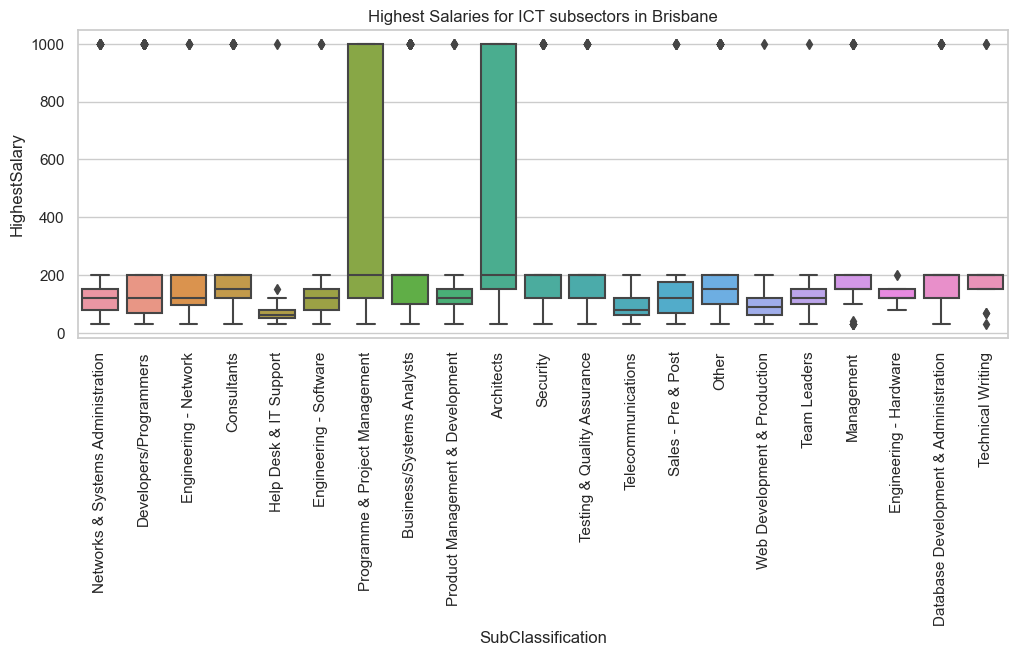

In [54]:
brisbane_ict_subclassifications = df[(df["Classification"] == 'Information & Communication Technology') & (df["Location"] == 'Brisbane')]

plt.figure(figsize=(12, 4))
sns.boxplot(
    data=brisbane_ict_subclassifications,
    x="SubClassification",
    y="HighestSalary",
    order=brisbane_ict_subclassifications["SubClassification"].unique()
)
plt.title("Highest Salaries for ICT subsectors in Brisbane")
plt.xticks(rotation=90)
plt.show()


# Part 3 – Data Analysis and Visualisation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [5]:
df=pd.read_csv('preprocessed_data.csv',low_memory=False)

In [6]:
# Choose two favorite cities/locations
city1='Sydney'
city2='Melbourne'

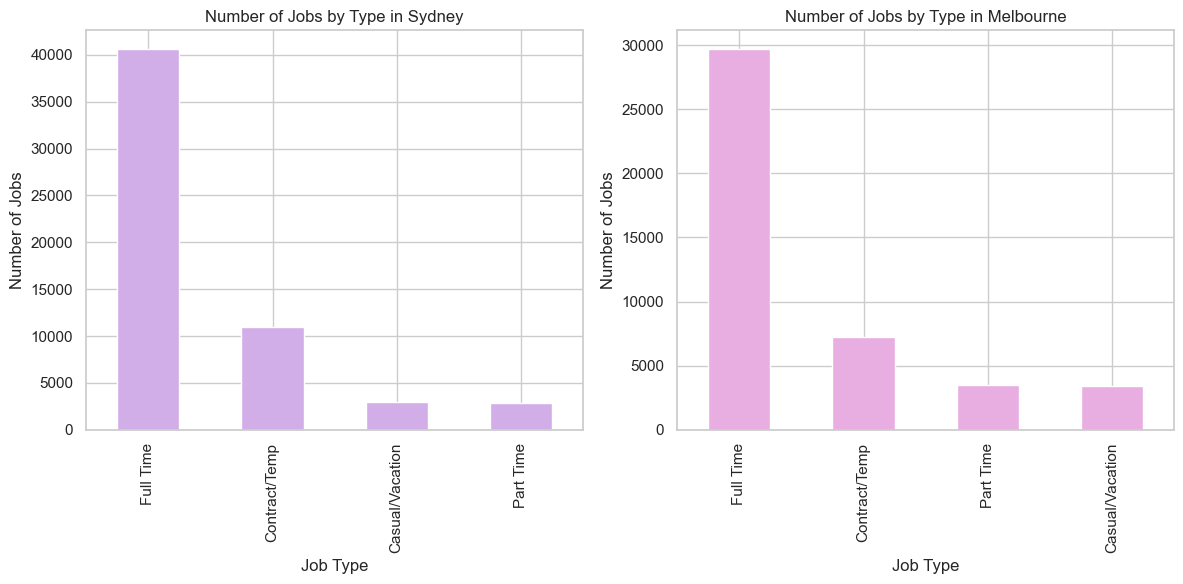

the total number of jobs in Sydney 60729

the total number of jobs in Melbourne 46656

Sydney Has more jobs than Melbourne


In [10]:
# Filter jobs for each city
city1_jobs = df[df["Location"] == city1]
city2_jobs = df[df["Location"] == city2]

# Count the number of jobs by type in each city
city1_job_types = city1_jobs["JobType"].value_counts()
city2_job_types = city2_jobs["JobType"].value_counts()
# Visualize the number of jobs by type in each city
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Number of Jobs by Type in " + city1)
city1_job_types.plot(kind="bar", color="#D1AEE8")
plt.xlabel("Job Type")
plt.ylabel("Number of Jobs")

plt.subplot(1, 2, 2)
plt.title("Number of Jobs by Type in " + city2)
city2_job_types.plot(kind="bar", color="#E8AEE2")
plt.xlabel("Job Type")
plt.ylabel("Number of Jobs")

plt.tight_layout()
plt.show()
# Print the total number of jobs in each city
city1_total_jobs = city1_jobs.shape[0]
city2_total_jobs = city2_jobs.shape[0]
print(f"the total number of jobs in {city1} {city1_total_jobs}")
print()
print(f"the total number of jobs in {city2} {city2_total_jobs}")
print()
if city1_total_jobs> city2_total_jobs:
    print(f"{city1} Has more jobs than {city2}")
elif city1_total_jobs< city2_total_jobs:
    print(f"{city2} Has more jobs than {city1}")
else:
    print("Both cities have the of jobs.")

Sydney has an approximate of 40,000 Full Time Jobs, while Melbourne has just under 30,000. As for Contract/Temp, Sydney has 10,000 jobs, while Melbourne has an approximate of 8,000 jobs. Sydney has an approximate of 3,000 for Casual and Part Time, while Melborne has 4,000 each. Overall, Sydney has far more Full Time and Contract roles while Melbourne has a few thousand more Part Time and Casual roles.

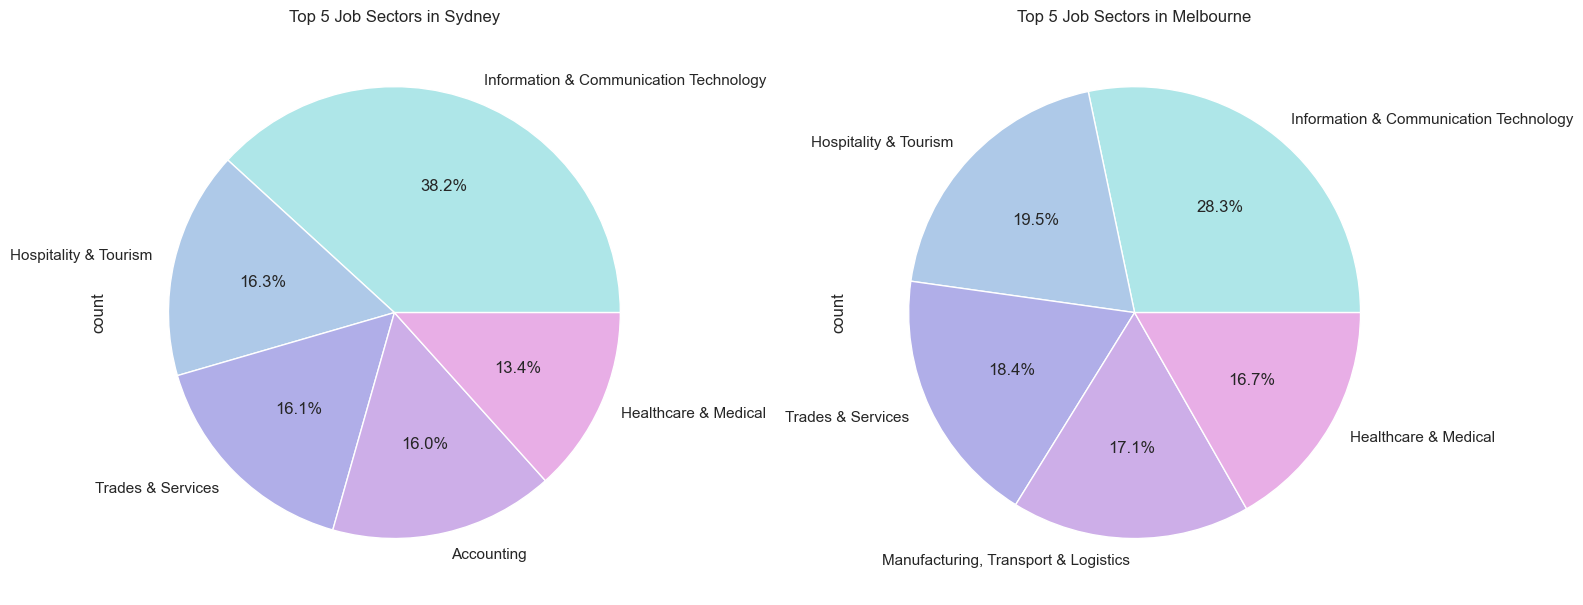

Sydney
Classification
Information & Communication Technology    9543
Hospitality & Tourism                     4071
Trades & Services                         4023
Accounting                                4008
Healthcare & Medical                      3335
Name: count, dtype: int64

Melbourne
Classification
Information & Communication Technology    5888
Hospitality & Tourism                     4057
Trades & Services                         3829
Manufacturing, Transport & Logistics      3555
Healthcare & Medical                      3485
Name: count, dtype: int64


In [16]:
# Get the top 5 job sectors and their counts in each city
city1_top_sectors = city1_jobs["Classification"].value_counts().head(5)
city2_top_sectors = city2_jobs["Classification"].value_counts().head(5)

# Visualize the top 5 job sectors in a pie chart for each city
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("Top 5 Job Sectors in " + city1)
city1_top_sectors.plot(kind="pie", autopct="%1.1f%%", colors=third_colour)

plt.subplot(1, 2, 2)
plt.title("Top 5 Job Sectors in " + city2)
city2_top_sectors.plot(kind="pie", autopct="%1.1f%%" , colors=third_colour)

plt.tight_layout()
plt.show()
print(f"{city1}\n{city1_top_sectors}")
print()
print(f"{city2}\n{city2_top_sectors}")

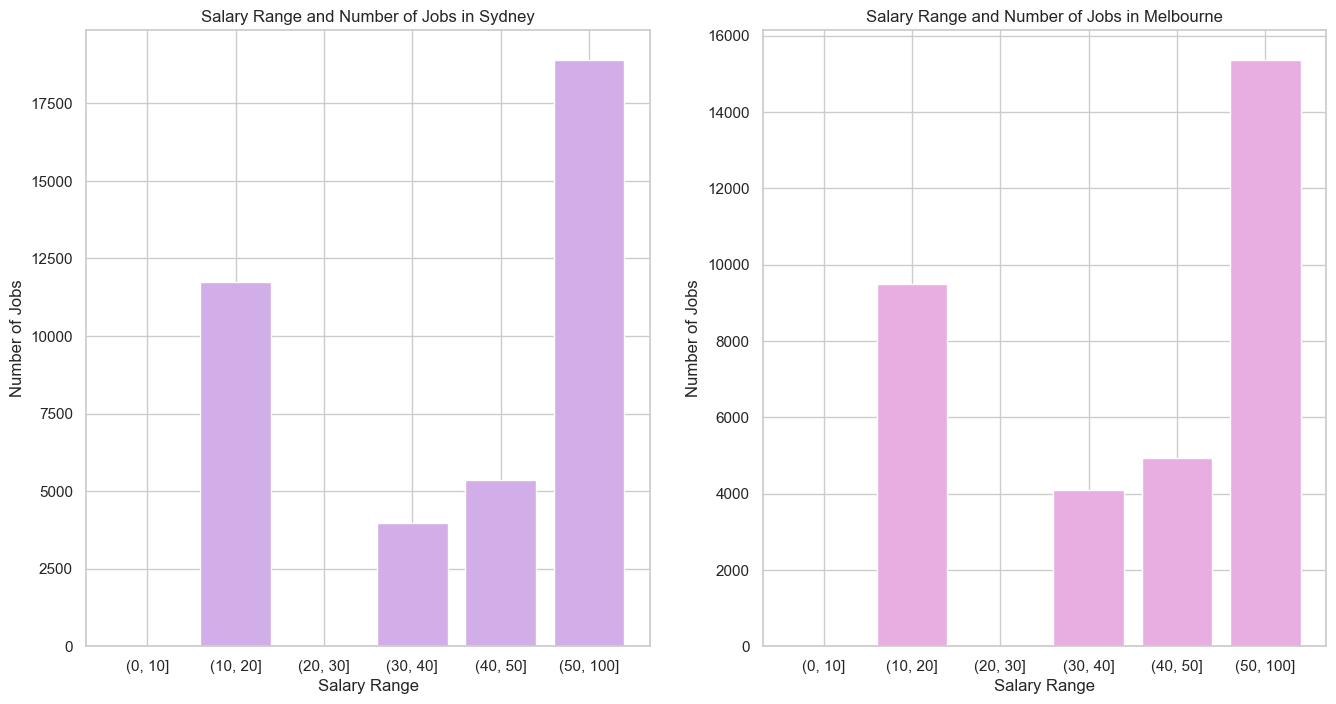

Sydney is more well-paid for employees.


In [18]:
# Calculate the salary range and the number of jobs for each range in each city
city1_salary_range = city1_jobs.groupby(pd.cut(city1_jobs["AverageSalary"], bins=[0, 10, 20, 30, 40, 50, 100])).size()
city2_salary_range = city2_jobs.groupby(pd.cut(city2_jobs["AverageSalary"], bins=[0, 10, 20, 30, 40, 50, 100])).size()

# Create a bar plot for salary range and number of jobs in city1
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.bar(city1_salary_range.index.astype(str), city1_salary_range.values, color="#D1AEE8")
plt.xlabel("Salary Range")
plt.ylabel("Number of Jobs")
plt.title("Salary Range and Number of Jobs in " + city1)
# Create a bar plot for salary range and number of jobs in city2
plt.subplot(1, 2, 2)
plt.bar(city2_salary_range.index.astype(str), city2_salary_range.values, color="#E8AEE2")
plt.xlabel("Salary Range")
plt.ylabel("Number of Jobs")
plt.title("Salary Range and Number of Jobs in " + city2)
plt.show()
# Determine which city is more well-paid
city1_total_jobs = city1_jobs.shape[0]
city2_total_jobs = city2_jobs.shape[0]

city1_avg_salary = city1_jobs["AverageSalary"].mean()
city2_avg_salary = city2_jobs["AverageSalary"].mean()

if city1_avg_salary > city2_avg_salary:
    print(city1, "is more well-paid for employees.")
elif city2_avg_salary > city1_avg_salary:
    print(city2, "is more well-paid for employees.")
else:
    print("Both cities have the same average salary.")

Sydney has over 17,500 number of jobs that pay (50,100], however Melbourne has less than 16,000 jobs that pay (50,100]. It can be inferenced from the data that since Sydney has more jobs, they also have more opportunities for greater salary ranges. 

In [19]:
# Get the top 5 companies in city 1 and their corresponding sectors
city1_top_companies = city1_jobs['Company'].value_counts().head(5)
city1_top_sectors = city1_jobs.loc[city1_jobs['Company'].isin(city1_top_companies.index), 'Classification']

# Get the top 5 companies in city 2 and their corresponding sectors
city2_top_companies = city2_jobs['Company'].value_counts().head(5)
city2_top_sectors = city2_jobs.loc[city2_jobs['Company'].isin(city2_top_companies.index), 'Classification']

# Print the top 5 companies in city 1 and their sectors
print("Top 5 companies in", city1, ":")
print(city1_top_companies)
print("Sectors:")
print(city1_top_sectors.unique())
print()

# Print the top 5 companies in city 2 and their sectors
print("Top 5 companies in", city2, ":")
print(city2_top_companies)
print("Sectors:")
print(city2_top_sectors.unique())

Top 5 companies in Sydney :
Company
Jora Local                       1919
Robert Walters                    607
Design & Build                    595
Paxus                             375
Bluefin Resources Pty Limited     354
Name: count, dtype: int64
Sectors:
['Information & Communication Technology' 'Hospitality & Tourism'
 'Construction' 'Trades & Services' 'Administration & Office Support'
 'Real Estate & Property' 'Human Resources & Recruitment'
 'Marketing & Communications' 'Sales' 'Design & Architecture'
 'Engineering' 'Accounting' 'Insurance & Superannuation'
 'Banking & Financial Services' 'Call Centre & Customer Service' 'Legal'
 'Manufacturing, Transport & Logistics' 'Government & Defence'
 'Consulting & Strategy' 'Retail & Consumer Products'
 'Healthcare & Medical' 'Science & Technology'
 'Mining, Resources & Energy' 'CEO & General Management'
 'Sport & Recreation' 'Community Services & Development']

Top 5 companies in Melbourne :
Company
Jora Local                        

# 2. Analyse by time.

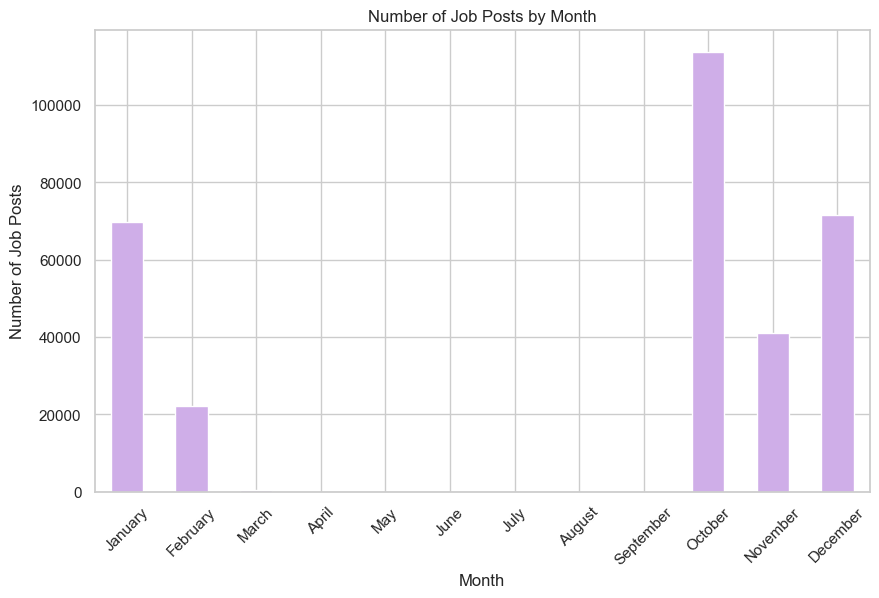

In [25]:
# Convert "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Group job posts by month and count the number of posts in each month
job_posts_by_month = df.groupby(df["Date"].dt.strftime("%B"))["Date"].count()

# Sort the months in chronological order
months = pd.Series(pd.date_range(start='1/1/2023', end='12/31/2023', freq='M').strftime('%B'))

# Reindex the job_posts_by_month Series with sorted months
job_posts_by_month = job_posts_by_month.reindex(months)

# Visualize the number of job posts by month using a bar chart
plt.figure(figsize=(10, 6))
job_posts_by_month.plot(kind="bar", color='#CFAEE8')
plt.xlabel("Month")
plt.ylabel("Number of Job Posts")
plt.title("Number of Job Posts by Month")
plt.xticks(rotation=45)
plt.show()

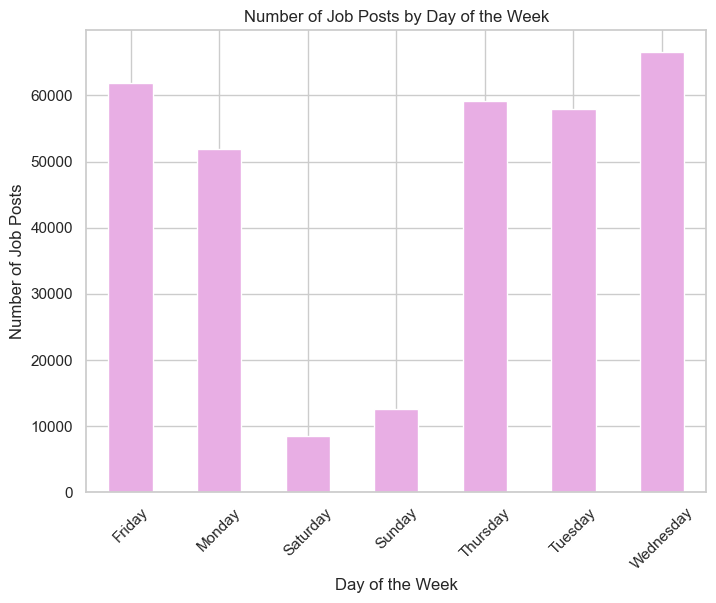

In [26]:
# Extract the day of the week from the "Date" column and create a new column
df["DayOfWeek"] = df["Date"].dt.dayofweek

# Map day of week values to corresponding names
day_of_week_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["DayOfWeek"] = df["DayOfWeek"].map(lambda x: day_of_week_names[x])

# Count the number of job posts for each day of the week
job_posts_by_day_of_week = df["DayOfWeek"].value_counts().sort_index()

# Visualize the number of job posts by day of the week
plt.figure(figsize=(8, 6))
job_posts_by_day_of_week.plot(kind="bar", color= '#E8AEE4')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Job Posts")
plt.title("Number of Job Posts by Day of the Week")
plt.xticks(rotation=45)
plt.show()

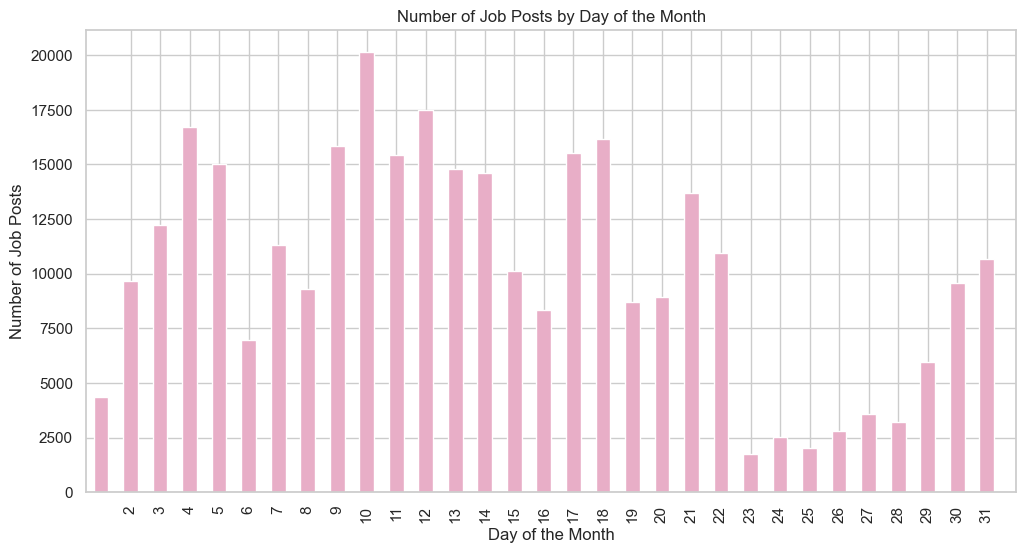

In [27]:
# Extract the day of the month from the "Date" column and create a new column
df["DayOfMonth"] = df["Date"].dt.day

# Count the number of job posts for each day of the month
job_posts_by_day = df["DayOfMonth"].value_counts().sort_index()

# Visualize the number of job posts by day of the month
plt.figure(figsize=(12, 6))
job_posts_by_day.plot(kind="bar", color= '#E8AEC7')
plt.xlabel("Day of the Month")
plt.ylabel("Number of Job Posts")
plt.title("Number of Job Posts by Day of the Month")
plt.xticks(range(1, 32))
plt.show()

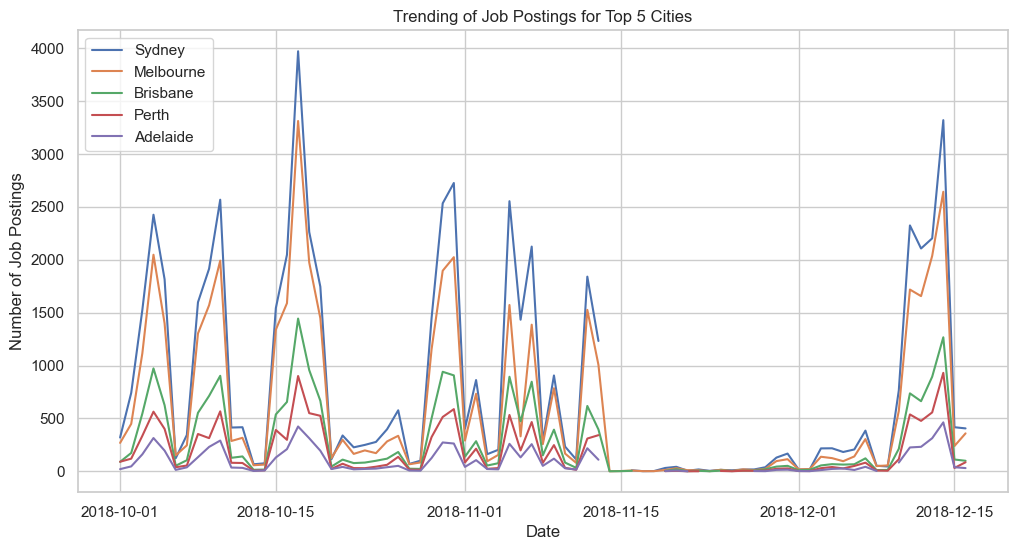

In [31]:
# Get the top 5 cities based on job postings
top_cities = df["Location"].value_counts().head(5).index.tolist()

# Filter the dataset for the top 5 cities
df_top_cities = df[df["Location"].isin(top_cities)]

# Count the number of job postings for each date and city
job_posts_by_city_date = df_top_cities.groupby(["Date", "Location"]).size().unstack()

# Plot the job postings trend for each city
plt.figure(figsize=(12, 6))
for city in top_cities:
    plt.plot(job_posts_by_city_date.index, job_posts_by_city_date[city], label=city)
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.title("Trending of Job Postings for Top 5 Cities")
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

# 3. Forecasting and skill extractions

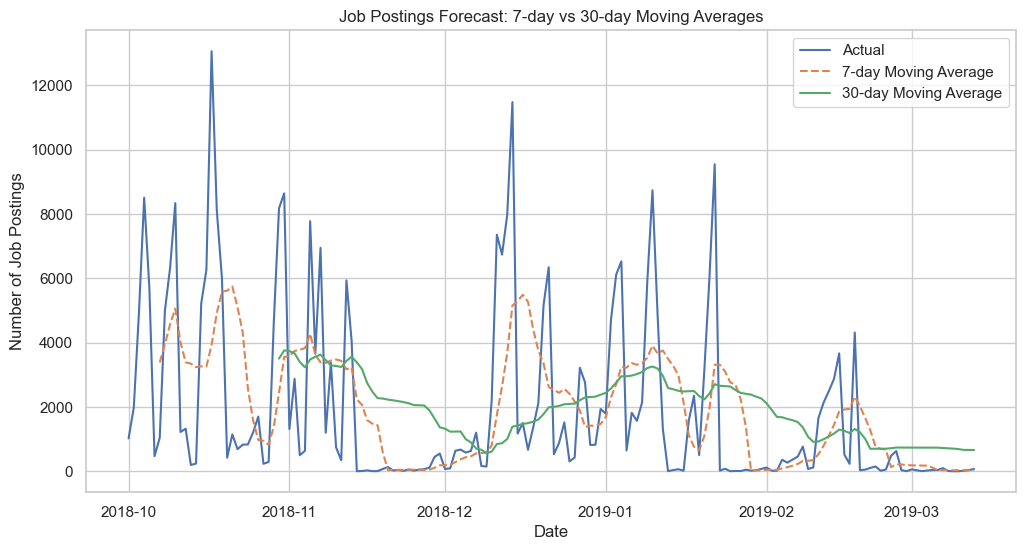

In [32]:
# Calculate the moving averages
Forecast_df = df.groupby("Date")['Id'].count().reset_index()
Forecast_df['7-day MA'] = Forecast_df['Id'].rolling(window=7).mean()
Forecast_df['30-day MA'] = Forecast_df['Id'].rolling(window=30).mean()

# Plotting the line chart
plt.figure(figsize=(12, 6))

# Plot actual job postings
plt.plot(Forecast_df['Date'], Forecast_df['Id'], label='Actual')

# Plot 7-day moving average with dashed line
plt.plot(Forecast_df['Date'], Forecast_df['7-day MA'], label='7-day Moving Average', linestyle='--')

# Plot 30-day moving average with underscore line
plt.plot(Forecast_df['Date'], Forecast_df['30-day MA'], label='30-day Moving Average', linestyle='-')

# Set the x-axis label and rotate tick labels
plt.xlabel("Date")

# Set the y-axis label
plt.ylabel("Number of Job Postings")

# Set the chart title
plt.title("Job Postings Forecast: 7-day vs 30-day Moving Averages")

# Add a legend
plt.legend()

# Display the plot
plt.show()

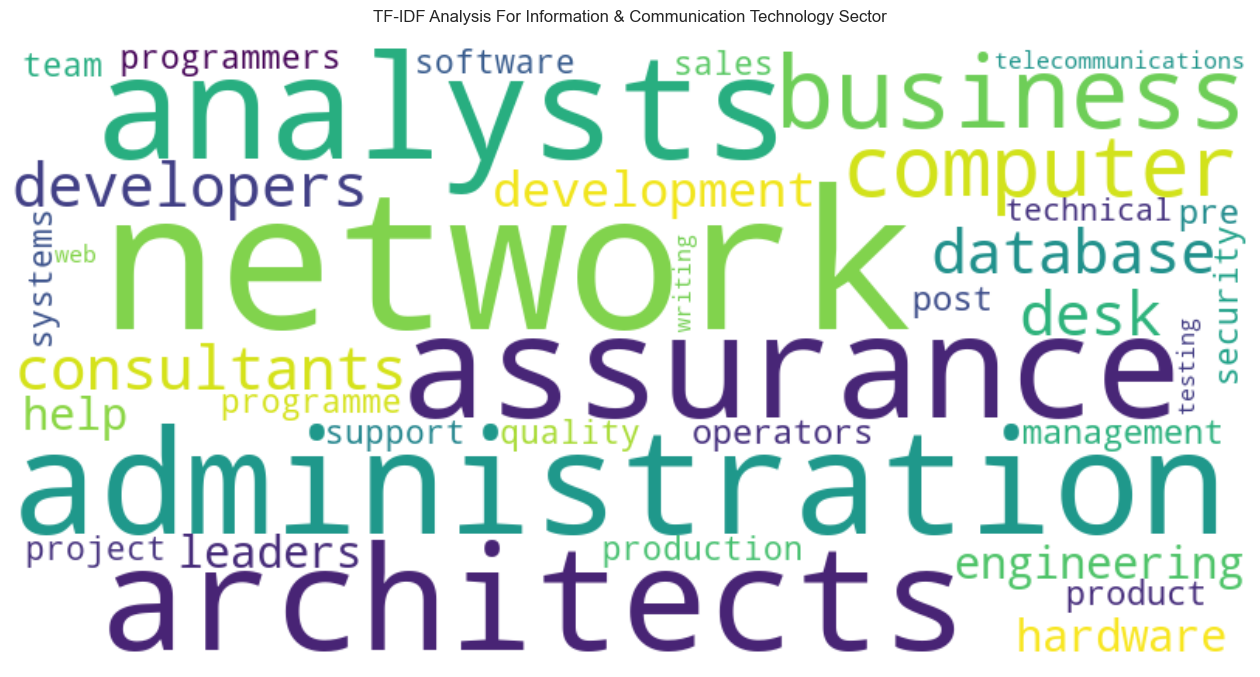

In [33]:
# Step 1: Define the corpus
It_df=df[df['Classification']=='Information & Communication Technology']['SubClassification'].tolist()
corpus = It_df

# Step 2: Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Step 3: Compute the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Step 4: Get the feature names (keywords)
feature_names = vectorizer.get_feature_names_out()

# Step 5: Generate word cloud
wordcloud_text = ' '.join(feature_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Step 6: Plot the word cloud
plt.figure(figsize=(16, 16))
plt.title("TF-IDF Analysis For Information & Communication Technology Sector\n")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Part 4 — Discussion.



Scenario 1:

In [34]:
#classifcations
Scenario1=df[df['Location']=='Brisbane'].groupby('Classification')['AverageSalary'].mean().reset_index()
Scenario1=Scenario1.sort_values('AverageSalary', ascending=False)
Scenario1=Scenario1[Scenario1['AverageSalary']>=80.00]
Scenario1

,Classification,AverageSalary
4,CEO & General Management,278.978947
17,Information & Communication Technology,189.427332
22,"Mining, Resources & Energy",170.962670
8,Consulting & Strategy,136.068702
14,Healthcare & Medical,125.121777
27,Self Employment,119.375000
7,Construction,116.359431
11,Engineering,114.668578
19,Legal,111.938792
13,Government & Defence,109.661250


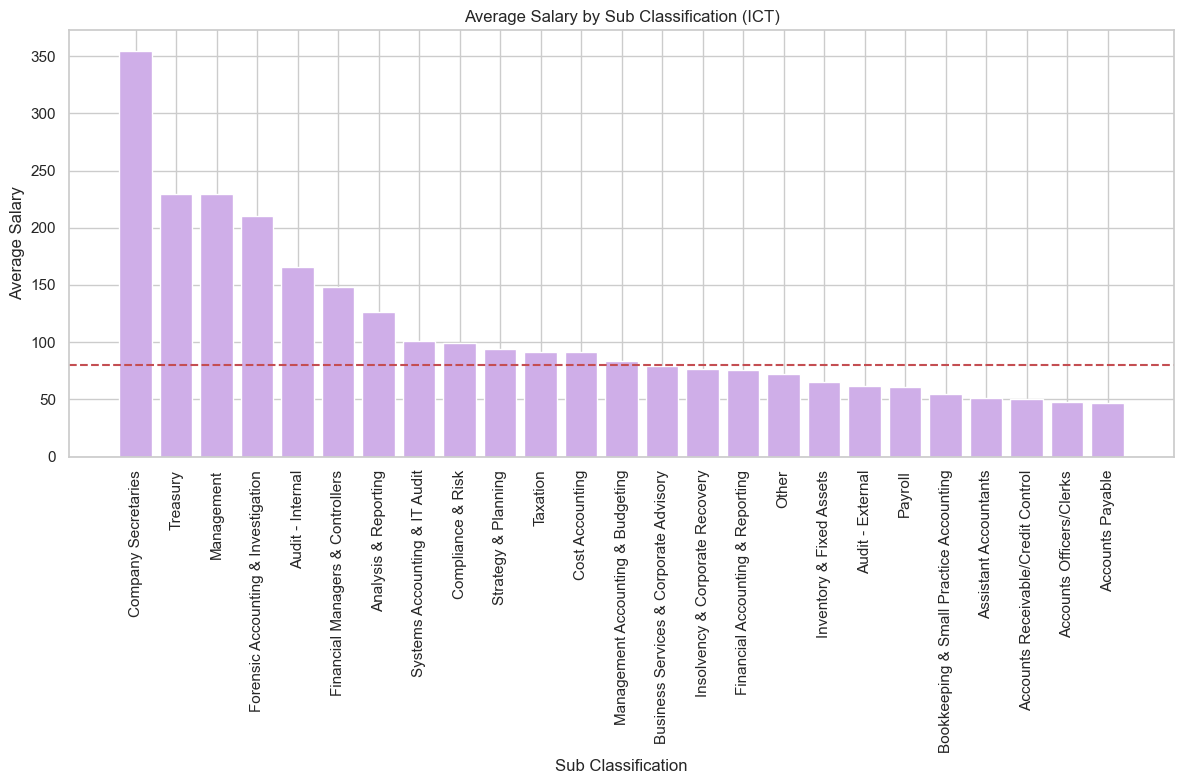

In [37]:
# choose Accounting classification
# Apply filters
filtered_data = df[(df['Location'] == 'Brisbane') &
                        (df['Classification'] == 'Accounting')]

# Calculate average of average salary by sub-classification and classification
result = filtered_data.groupby(['SubClassification', 'Classification'])['AverageSalary'].mean()

# Convert the result to a DataFrame for easier manipulation
result_df = result.reset_index()

# Sort the data based on average salary in descending order
result_df.sort_values('AverageSalary', ascending=False, inplace=True)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(range(len(result_df)), result_df['AverageSalary'], color='#CFAEE8')
plt.xticks(range(len(result_df)), result_df['SubClassification'], rotation=90)
plt.axhline(y=80, color='r', linestyle='--')  # Add a horizontal line at y=80
plt.xlabel('Sub Classification')
plt.ylabel('Average Salary')
plt.title('Average Salary by Sub Classification (ICT)')
plt.tight_layout()
plt.show()

In [35]:
#subClassfication of Accounting
Scenario1=df[(df['Location']=='Brisbane')&(df['Classification']=='Accounting')].groupby('SubClassification')['AverageSalary'].mean().reset_index()
Scenario1=Scenario1.sort_values('AverageSalary', ascending=False)
Scenario1=Scenario1[Scenario1['AverageSalary']>=80.00]
Scenario1

,SubClassification,AverageSalary
9,Company Secretaries,354.750000
24,Treasury,229.833333
17,Management,229.280000
14,Forensic Accounting & Investigation,209.900000
6,Audit - Internal,166.000000
13,Financial Managers & Controllers,148.537313
3,Analysis & Reporting,126.744444
22,Systems Accounting & IT Audit,100.714286
10,Compliance & Risk,99.166667
21,Strategy & Planning,94.000000


# Scenario 2:

In [38]:

# Explore job titles and classifications
job_titles = df['Title'].unique()
classifications = df['Classification'].unique()

# Analyze locations
locations = df['Location'].unique()

# Review sub-classifications
sub_classifications = df['SubClassification'].unique()

# Examine average salaries
average_salaries = df.groupby('Classification')['AverageSalary'].mean()
grouped_data = df.groupby(['Classification', 'SubClassification']).size().reset_index(name='Count')

# Analyze job demand and growth
job_demand = grouped_data.groupby('Classification')['Count'].sum()

# Consider regional variations
regional_demand = df.groupby('Location').size().reset_index(name='Count')


In [39]:
# Print the average salaries for each classification
print("Average Salaries by Classification:")
average_salaries

Average Salaries by Classification:


Classification
Accounting                                 87.655312
Administration & Office Support            48.612858
Advertising, Arts & Media                  70.353541
Banking & Financial Services              111.021373
CEO & General Management                  255.720047
Call Centre & Customer Service             48.594561
Community Services & Development           58.360169
Construction                              126.532919
Consulting & Strategy                     157.552282
Design & Architecture                      89.153315
Education & Training                       72.726758
Engineering                               121.114365
Farming, Animals & Conservation            57.797052
Government & Defence                      103.711634
Healthcare & Medical                      117.438628
Hospitality & Tourism                      40.248888
Human Resources & Recruitment              89.627415
Information & Communication Technology    182.580155
Insurance & Superannuation     

In [40]:
# Print the job demand for each classification
print("Job Demand by Classification:")
job_demand

Job Demand by Classification:


Classification
Accounting                                 9365
Administration & Office Support           10017
Advertising, Arts & Media                   833
Banking & Financial Services               4632
CEO & General Management                    843
Call Centre & Customer Service             3971
Community Services & Development           4484
Construction                               8369
Consulting & Strategy                      1205
Design & Architecture                      1810
Education & Training                       9272
Engineering                                6453
Farming, Animals & Conservation             882
Government & Defence                       7435
Healthcare & Medical                      17068
Hospitality & Tourism                     15513
Human Resources & Recruitment              4140
Information & Communication Technology    22787
Insurance & Superannuation                 1473
Legal                                      4232
Manufacturing, Transport 

In [41]:
# Print the regional demand for job opportunities
print("Regional Demand:")
regional_demand

Regional Demand:


,Location,Count
0,ACT,6249
1,Adelaide,6650
2,Adelaide Hills & Barossa,193
3,Albany & Great Southern,150
4,Albury Area,416
...,...,...
60,Western QLD,514
61,Whyalla & Eyre Peninsula,201
62,"Wollongong, Illawarra & South Coast",1657
63,Yarra Valley & High Country,499
